## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [13]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image

from pylab import subplot
from skimage.color import rgb2gray



Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [2]:
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_im = io.imread(img_path.__add__(img_name))

lena_near = misc.imresize(lena_im, 20, interp = 'nearest', mode = None)
lena_bilinear = misc.imresize(lena_im, 20, interp = 'bilinear', mode = None)
lena_bicubic = misc.imresize(lena_im, 20, interp = 'bicubic', mode = None)

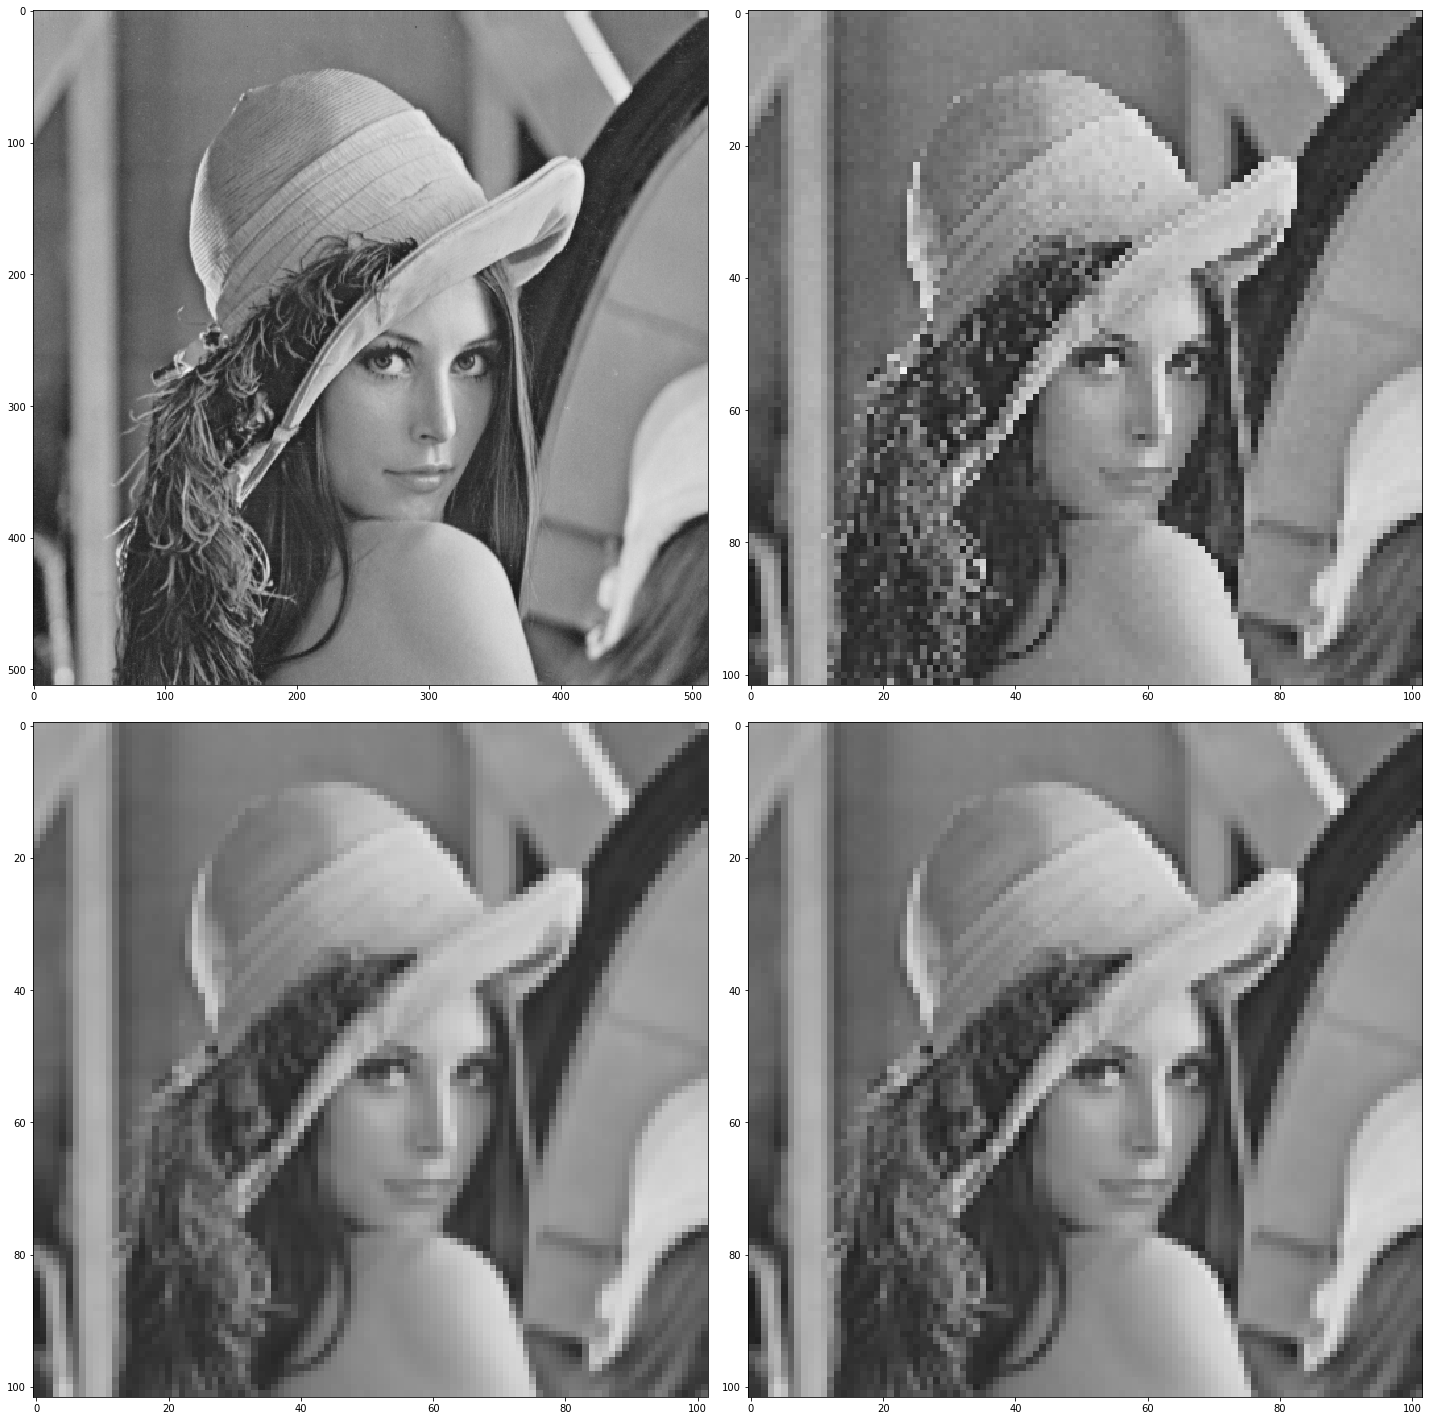

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
subplot(2,2,1)
io.imshow(lena_im)
subplot(2,2,2)
io.imshow(lena_near)
subplot(2,2,3)
io.imshow(lena_bilinear)
subplot(2,2,4)
io.imshow(lena_bicubic)

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [54]:
def simple_blend (image1, image2):
    blend_image = np.zeros_like(image1)
    height, width, depth = image1.shape
    for i in range(0, height):
        for j in range(0, np.ceil(width/2).astype('ubyte')):
            blend_image[i,j] = image1[i,j]
    for i in range(0, height):
        for j in range(np.ceil(width/2).astype('ubyte'), width):
            blend_image[i,j] = image2[i,j]
    return blend_image 

def alpha_blend(image1, image2, window):
    blend_image = np.zeros_like(image1)
    height, width, depth = image1.shape
    for i in range(0, height):
        for j in range(0, np.ceil(width/2).astype('ubyte')-window):
            blend_image[i,j] = image1[i,j]    
    for i in range(0, height):
        for j in range(np.ceil(width/2).astype('ubyte')+window, width):
            blend_image[i,j] = image2[i,j]
    x1 = np.ceil(width/2).astype('ubyte')-window   
    x2 = np.ceil(width/2).astype('ubyte')+window   
    x = np.arange(x1, x2)
    alpha = x/(x1-x2)-x2/(x1-x2)
    for i in range(0, height):
        for j in range(np.ceil(width/2).astype('ubyte')-window, np.ceil(width/2).astype('ubyte')+window):
            blend_image[i,j] = alpha[j - np.ceil(width/2).astype('ubyte')-window]*image1[i,j] + (1-alpha[j - np.ceil(width/2).astype('ubyte')-window])*image2[i,j]
    return blend_image   

def pyramid_blend(image1, image2):
    #define levels of laplacian pyramids for both pictures
    laplacian1 = transform.pyramid_laplacian(image1, 5)
    laplacian2 = transform.pyramid_laplacian(image2, 5)
    l1 = [l1 for l1 in laplacian1]
    l2 = [l2 for l2 in laplacian2]
     
    #define the mask and compute the gaussian pyramid    
    mask = np.zeros_like(image1).astype(float)/255
    for i in range(0, 300):
        for j in range(0, 150):
            mask[i,j] = 1
    gaussianmask = transform.pyramid_gaussian(mask, 5)    
    m = [m for m in gaussianmask] 
    
    #compute the levels of the laplacian pyramid for the resulting image
    lapl_0 = l1[0]*m[0] + l2[0]*(1-m[0])
    lapl_1 = l1[1]*m[1] + l2[1]*(1-m[1])
    lapl_2 = l1[2]*m[2] + l2[2]*(1-m[2])
    lapl_3 = l1[3]*m[3] + l2[3]*(1-m[3])
    lapl_4 = l1[4]*m[4] + l2[4]*(1-m[4])
    lapl_5 = l1[5]*m[5] + l2[5]*(1-m[5])
    
    #form a tupple with the pyramid levels
    lapl = (lapl_0, lapl_1, lapl_2, lapl_3, lapl_4, lapl_5)

    #now collapse
    blend = lapl[5]  
    for i in range(4, -1, -1):
        blend = transform.pyramid_expand(blend) 
        if blend.shape > lapl[i].shape:
            blend = np.delete(blend, (-1), axis = 0)
            blend = np.delete(blend, (-1), axis = 1)  
        blend = blend + lapl[i]
    
    return blend

In [55]:
img_path = './images/'
img_name = 'apple.jpeg'
apple_im = io.imread(img_path.__add__(img_name))

img_path = './images/'
img_name = 'orange.jpeg'
orange_im = io.imread(img_path.__add__(img_name))

simpleblend = simple_blend(apple_im, orange_im)
alphablend = alpha_blend(apple_im, orange_im, 40)

img_path = './images/'
img_name = 'apple.jpeg'
apple_im = io.imread(img_path.__add__(img_name))
apple_im = (rgb2gray(apple_im))
img_path = './images/'
img_name = 'orange.jpeg'
orange_im = io.imread(img_path.__add__(img_name))
orange_im = (rgb2gray(orange_im))

pyramidblend = pyramid_blend(apple_im, orange_im)


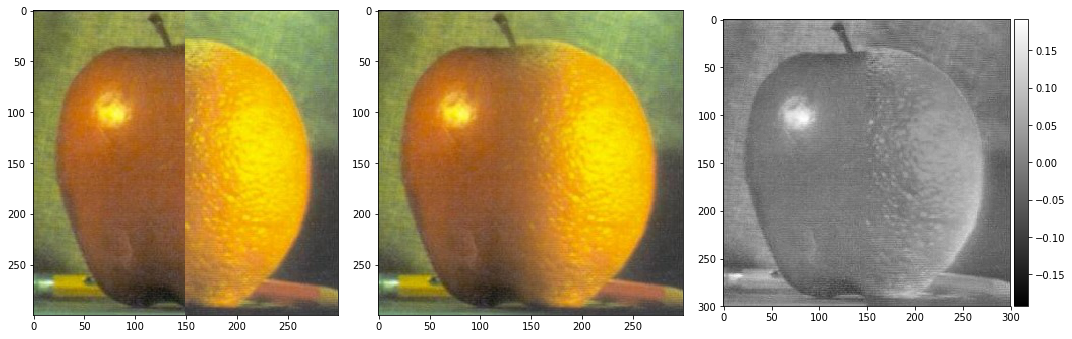

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
subplot(1,3,1)
io.imshow(simpleblend)
subplot(1,3,2)
io.imshow(alphablend)
subplot(1,3,3)
io.imshow(pyramidblend, cmap = cm.gray)